# Série temporal de Concentração de CO2 na Atmosfera

In [25]:
#inicializações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from urllib.request import urlopen
import datetime as dt

## Extração de dados

In [3]:
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'

In [4]:
df = pd.read_csv(url,delim_whitespace=True, comment= '#', header = None, names = ['Year','Month','Decimal Date', 'Monthly Average', 'de-seasonalized', '#Days', 'St.Dev of days', 'unc. of mon mean'])

In [5]:
df.sample(5)

,Year,Month,Decimal Date,Monthly Average,de-seasonalized,#Days,St.Dev of days,unc. of mon mean
123,1968,6,1968.4563,325.36,323.19,-1,-9.99,-0.99
660,2013,3,2013.2083,397.66,396.07,30,0.71,0.25
718,2018,1,2018.0417,408.15,407.83,29,0.55,0.19
528,2002,3,2002.2083,374.30,372.61,24,0.62,0.24
533,2002,8,2002.6250,372.03,373.70,28,0.65,0.24


In [6]:
df.columns

Index(['Year', 'Month', 'Decimal Date', 'Monthly Average', 'de-seasonalized',
       '#Days', 'St.Dev of days', 'unc. of mon mean'],
      dtype='object')

## Pré-processamento dos dados

In [7]:
#Início do registro
df[['Year','Decimal Date']].min()

Year            1958.0000
Decimal Date    1958.2027
dtype: float64

In [8]:
#último registro
df[['Year','Decimal Date']].max()

Year            2023.000
Decimal Date    2023.625
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              786 non-null    int64  
 1   Month             786 non-null    int64  
 2   Decimal Date      786 non-null    float64
 3   Monthly Average   786 non-null    float64
 4   de-seasonalized   786 non-null    float64
 5   #Days             786 non-null    int64  
 6   St.Dev of days    786 non-null    float64
 7   unc. of mon mean  786 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 49.2 KB


In [10]:
df.isna().sum()

Year                0
Month               0
Decimal Date        0
Monthly Average     0
de-seasonalized     0
#Days               0
St.Dev of days      0
unc. of mon mean    0
dtype: int64

In [11]:
df['Date'] = df['Year'].map(str) + '-' +  df['Month'].map(str)

In [26]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
df['Date']

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
781    2023-04
782    2023-05
783    2023-06
784    2023-07
785    2023-08
Name: Date, Length: 786, dtype: object

In [46]:
df

,Year,Month,Decimal Date,Monthly Average,de-seasonalized,#Days,St.Dev of days,unc. of mon mean,Date
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,1958-03
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,1958-04
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,1958-05
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,1958-06
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,1958-07
...,...,...,...,...,...,...,...,...,...
781,2023,4,2023.2917,423.36,420.69,28,0.60,0.22,2023-04
782,2023,5,2023.3750,424.00,420.55,31,0.69,0.24,2023-05
783,2023,6,2023.4583,423.68,421.19,29,0.57,0.20,2023-06
784,2023,7,2023.5417,421.83,421.42,21,0.48,0.20,2023-07


In [47]:
serie_temporal = df.set_index('Date')['Monthly Average']

In [48]:
serie_temporal.asfreq('M')

Date
1958-03-31   NaN
1958-04-30   NaN
1958-05-31   NaN
1958-06-30   NaN
1958-07-31   NaN
              ..
2023-03-31   NaN
2023-04-30   NaN
2023-05-31   NaN
2023-06-30   NaN
2023-07-31   NaN
Freq: M, Name: Monthly Average, Length: 785, dtype: float64

## Visualização dos dados

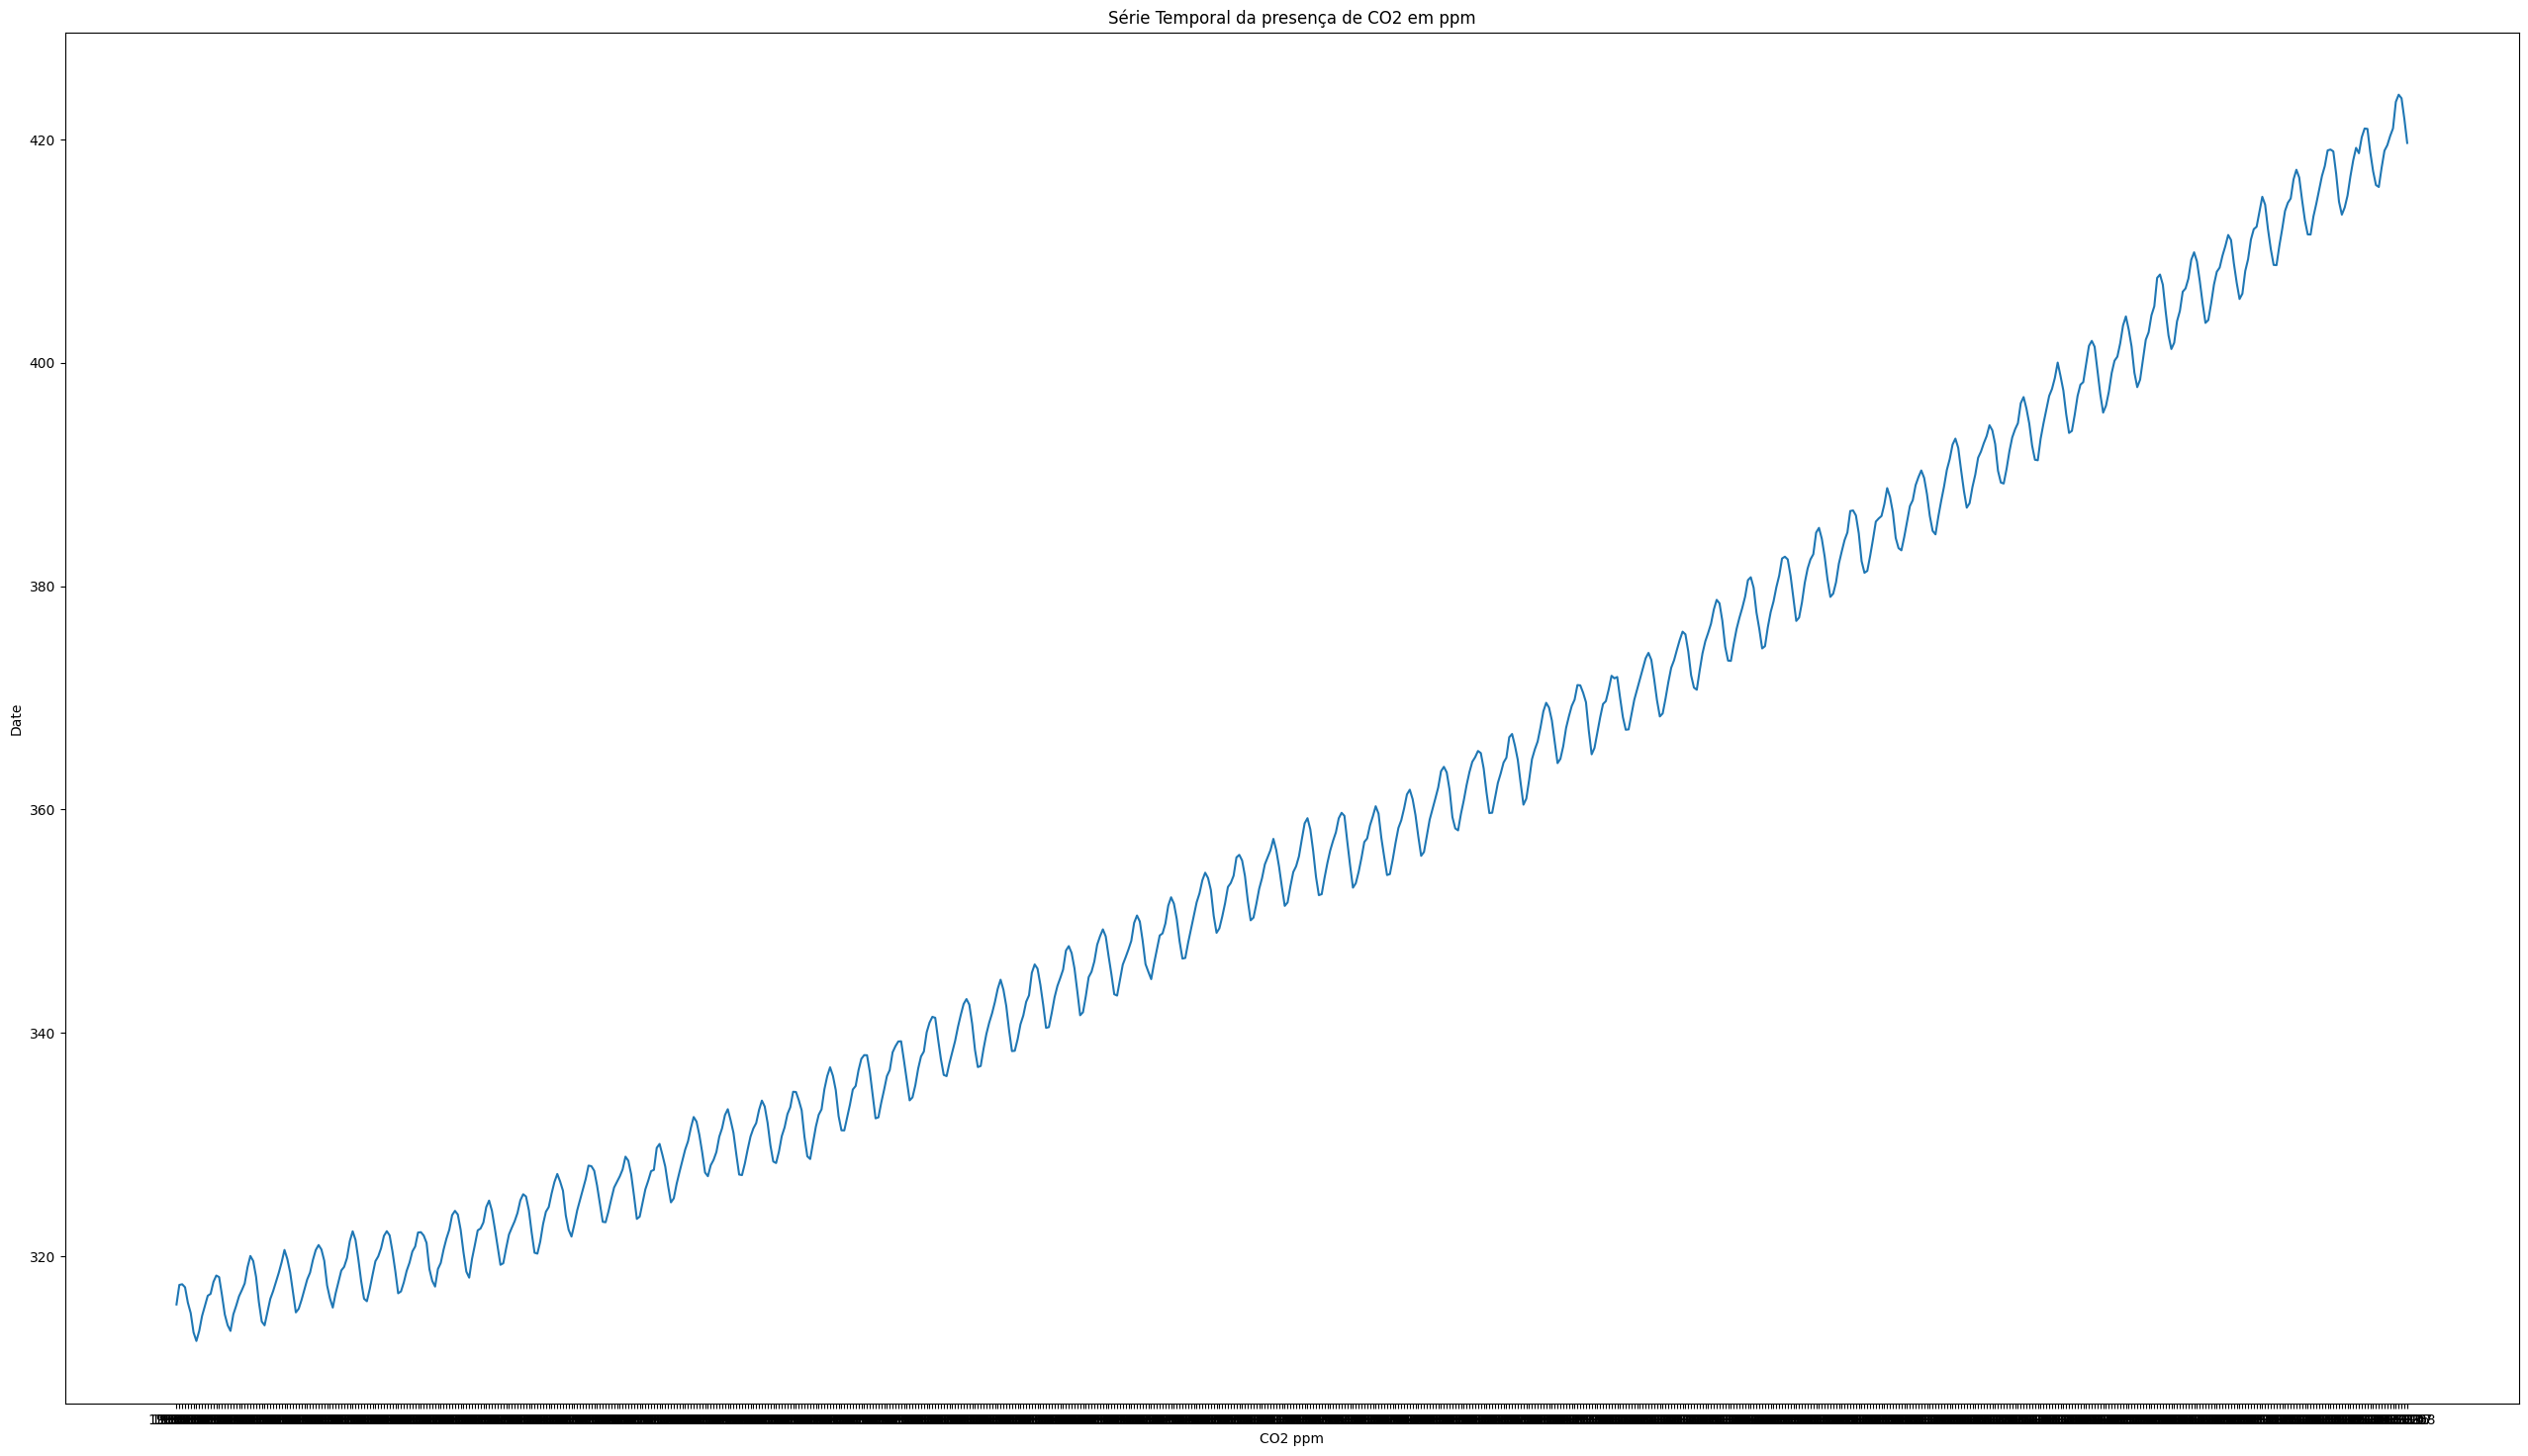

In [43]:
plt.figure(figsize = (32, 18))
plt.plot(serie_temporal)
plt.xlabel('CO2 ppm')
plt.ylabel('Date')
plt.title('Série Temporal da presença de CO2 em ppm')
plt.show()